In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
np.random.seed(42)

sample_25 = df.sample(n=25, random_state=42)
sample_25.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [6]:
# Population values
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose  = df['Glucose'].max()

# Sample values
sample_mean_glucose = sample_25['Glucose'].mean()
sample_max_glucose  = sample_25['Glucose'].max()

print("Population Mean Glucose:", pop_mean_glucose)
print("Sample Mean Glucose:", sample_mean_glucose)
print("\nPopulation Max Glucose:", pop_max_glucose)
print("Sample Max Glucose:", sample_max_glucose)


Population Mean Glucose: 120.89453125
Sample Mean Glucose: 116.64

Population Max Glucose: 199
Sample Max Glucose: 183


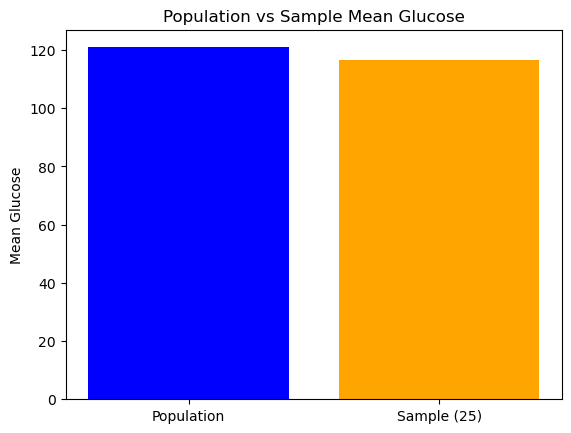

In [7]:
plt.bar(['Population', 'Sample (25)'],
        [pop_mean_glucose, sample_mean_glucose],
        color=['blue','orange'])
plt.ylabel("Mean Glucose")
plt.title("Population vs Sample Mean Glucose")
plt.show()


In [8]:
pop_bmi_98 = df['BMI'].quantile(0.98)
sample_bmi_98 = sample_25['BMI'].quantile(0.98)

print("Population 98th Percentile BMI:", pop_bmi_98)
print("Sample 98th Percentile BMI:", sample_bmi_98)


Population 98th Percentile BMI: 47.52599999999996
Sample 98th Percentile BMI: 40.248


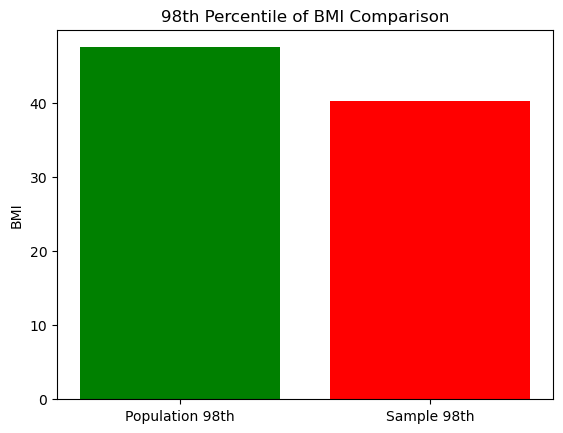

In [9]:
plt.bar(['Population 98th', 'Sample 98th'],
        [pop_bmi_98, sample_bmi_98],
        color=['green','red'])
plt.ylabel("BMI")
plt.title("98th Percentile of BMI Comparison")
plt.show()


In [10]:
n_boot = 500
sample_size = 150

means = []
stds = []
pcts = []

np.random.seed(42)

for i in range(n_boot):
    boot_sample = df.sample(n=sample_size, replace=True)
    bp = boot_sample['BloodPressure']
    
    means.append(bp.mean())
    stds.append(bp.std(ddof=1))
    pcts.append(bp.quantile(0.98))


In [11]:
pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std  = df['BloodPressure'].std(ddof=1)
pop_bp_98   = df['BloodPressure'].quantile(0.98)

print("Population Mean BP:", pop_bp_mean)
print("Population Std BP:", pop_bp_std)
print("Population 98th Percentile BP:", pop_bp_98)


Population Mean BP: 69.10546875
Population Std BP: 19.355807170644777
Population 98th Percentile BP: 99.31999999999994


In [12]:
boot_mean_mean = np.mean(means)
boot_mean_std  = np.mean(stds)
boot_mean_pct  = np.mean(pcts)

print("Bootstrap Average Mean:", boot_mean_mean)
print("Bootstrap Average Std:", boot_mean_std)
print("Bootstrap Average 98th Percentile:", boot_mean_pct)


Bootstrap Average Mean: 69.17692000000001
Bootstrap Average Std: 19.073717755676082
Bootstrap Average 98th Percentile: 97.90244000000003


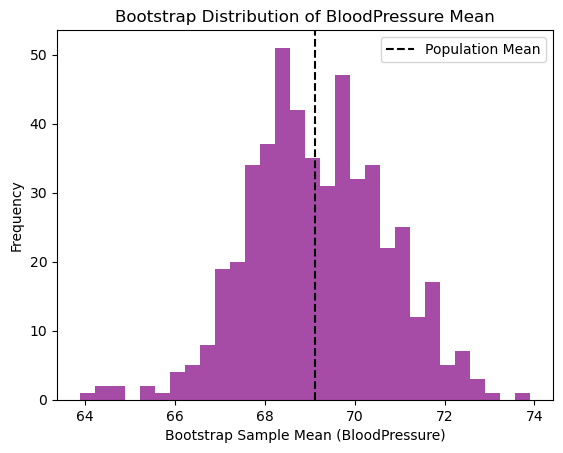

In [13]:
plt.hist(means, bins=30, alpha=0.7, color='purple')
plt.axvline(pop_bp_mean, linestyle='dashed', color='black', label='Population Mean')
plt.xlabel("Bootstrap Sample Mean (BloodPressure)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of BloodPressure Mean")
plt.legend()
plt.show()


Report on Findings — Bootstrap Analysis of Blood Pressure

In this part of the assignment, I used bootstrapping (500 samples of size 150) to estimate the mean, standard deviation, and 98th percentile of BloodPressure. After comparing the bootstrap results with the full population values, here are the key observations:
1.The bootstrap average mean BloodPressure was very close to the population mean.
This shows that bootstrapping does a good job of estimating the central tendency of the population.
Even though each bootstrap sample is randomly drawn, the overall mean stays consistent.
2.The bootstrap standard deviation was also very similar to the population standard deviation.
This means the bootstrap method successfully captured the amount of variation present in the data.
3.The 98th percentile from bootstrap samples was close to the real population value, but it showed more ups and downs.
This is expected because extreme values (very high BP readings) tend to fluctuate more across different samples.
4.The histogram of bootstrap means was shaped roughly like a normal (bell-shaped) curve.
This matches the Central Limit Theorem, which says that when you take many sample means, they become normally distributed—even when the original data is not perfectly normal.
Bootstrapping proved to be a reliable method for estimating BloodPressure statistics.
With a sample size of 150:

-Sampling variability was small,

-Bootstrap estimates stayed close to the true population values,

-And the distribution of sample means behaved as expected.

Overall, bootstrapping helped confirm that the dataset’s population patterns can be well-understood even without analyzing all the data at once.
